<a href="https://colab.research.google.com/github/imran-ANU/labour_market/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Prediction.csv to Customer-Churn-Prediction.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Customer-Churn-Prediction.csv']),sep=',')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


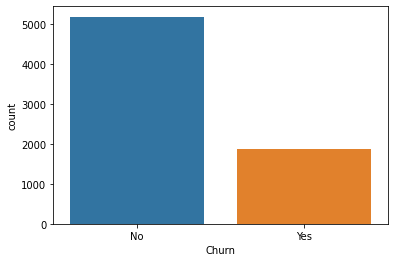

In [ ]:
sb.countplot(df['Churn'])

In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
Churned = df[df.Churn=='Yes'].shape[0]
Retained = df[df.Churn=='No'].shape[0]

In [ ]:
Churned

1869

In [ ]:
ch_per = (Churned/(Churned+Retained))*100    #percentage of Churned
Re_per = (Retained/(Churned+Retained))*100

In [ ]:
ch_per

26.536987079369588

In [ ]:
Re_per

73.4630129206304

In [ ]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


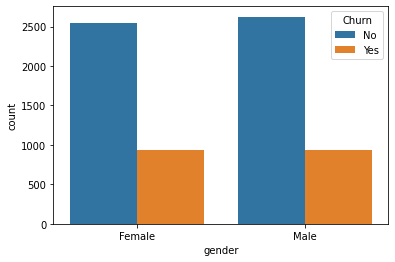

In [ ]:
sb.countplot(x='gender',hue='Churn', data=df)

In [ ]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

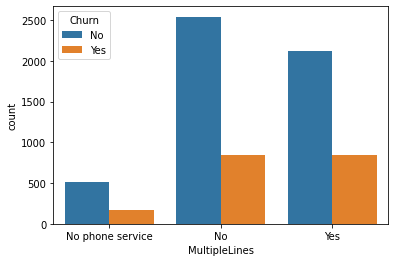

In [ ]:
sb.countplot(x='MultipleLines',hue='Churn', data=df)

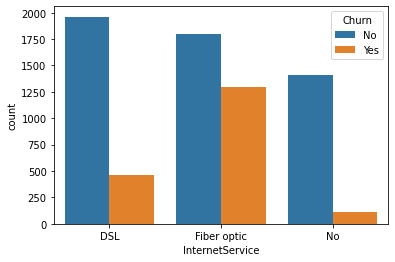

In [ ]:
sb.countplot(x='InternetService',hue='Churn', data=df)

In [ ]:
df = df.drop("customerID",axis=1)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 20)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [ ]:
x = df.drop('Churn', axis=1)
y = df.Churn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
feature_x = StandardScaler().fit_transform(x)

In [ ]:
feature_x

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(feature_x,y,test_size=0.25,random_state=42)

In [ ]:
xtest

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.32816441, -0.642709  ],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
        -1.31320824,  1.72841048],
       [-1.00955867, -0.44014635,  1.03453023, ...,  1.33486261,
        -1.50930029, -1.68953865],
       ...,
       [ 0.99053183, -0.44014635, -0.96662231, ..., -0.53774716,
         0.20401242, -0.89369395],
       [-1.00955867, -0.44014635, -0.96662231, ...,  0.39855772,
        -0.99912861,  0.94421487],
       [-1.00955867,  2.27197156, -0.96662231, ..., -0.53774716,
         0.30039665,  0.08588868]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(xtest)

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
model.score(xtest,ytest)

0.8103350369108461

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,model.predict(xtest))

0.8103350369108461

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytest,model.predict(xtest))

array([[1163,  119],
       [ 215,  264]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(ytest,model.predict(xtest))

'              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.87      1282\n           1       0.69      0.55      0.61       479\n\n    accuracy                           0.81      1761\n   macro avg       0.77      0.73      0.74      1761\nweighted avg       0.80      0.81      0.80      1761\n'

In [ ]:
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help

In [ ]:
!apt

apt 1.6.14 (amd64)
Usage: apt [options] command

apt is a commandline package manager and provides commands for
searching and managing as well as querying information about packages.
It provides the same functionality as the specialized APT tools,
like apt-get and apt-cache, but enables options more suitable for
interactive use by default.

Most used commands:
  list - list packages based on package names
  search - search in package descriptions
  show - show package details
  install - install packages
  remove - remove packages
  autoremove - Remove automatically all unused packages
  update - update list of available packages
  upgrade - upgrade the system by installing/upgrading packages
  full-upgrade - upgrade the system by removing/installing/upgrading packages
  edit-sources - edit the source information file

See apt(8) for more information about the available commands.
Configuration options and syntax is detailed in apt.conf(5).
Information about how to configure sources can

**IMPACT LEARNNG**

In [ ]:
from tensorflow import keras
import keras
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
MD = keras.Sequential([
                       keras.layers.Dense(20,input_shape=(20,),activation='relu'),
                       keras.layers.Dense(15,activation='relu'),
                       keras.layers.Dense(1,activation='sigmoid'),


])

In [ ]:
MD.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)

**Impact Learning**

In [ ]:
pip install ImpactLearning

     |████████████████████████████████| 2.9 MB 4.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.8 MB/s 
     |████████████████████████████████| 516.2 MB 4.2 kB/s 
     |████████████████████████████████| 3.0 MB 13.7 MB/s 
     |████████████████████████████████| 454 kB 18.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Fo

In [ ]:
from ImpactLearning import Classifier

In [ ]:
il = Classifier()
il.fit(xtrain, ytrain,xtest, ytest, CCapacity=1, num_classes=3, optimizer="GD", loss_function="CategoricalCrossentropy")
il.train(epochs = 10000, lr=0.001, progress_per=100)

Epoch: 100, train_loss: 0.908595, test_loss: 0.888725, train_accuracy: 0.689322 test_accuracy: 0.703578
Epoch: 200, train_loss: 0.886814, test_loss: 0.866700, train_accuracy: 0.700492 test_accuracy: 0.712663
Epoch: 300, train_loss: 0.866683, test_loss: 0.846887, train_accuracy: 0.707686 test_accuracy: 0.723453
Epoch: 400, train_loss: 0.847546, test_loss: 0.828104, train_accuracy: 0.714123 test_accuracy: 0.732538
Epoch: 500, train_loss: 0.829366, test_loss: 0.810262, train_accuracy: 0.720939 test_accuracy: 0.738217
Epoch: 600, train_loss: 0.812106, test_loss: 0.793323, train_accuracy: 0.726051 test_accuracy: 0.741056
Epoch: 700, train_loss: 0.795729, test_loss: 0.777248, train_accuracy: 0.730405 test_accuracy: 0.750710
Epoch: 800, train_loss: 0.780200, test_loss: 0.762005, train_accuracy: 0.733813 test_accuracy: 0.753549
Epoch: 900, train_loss: 0.765478, test_loss: 0.747553, train_accuracy: 0.739114 test_accuracy: 0.757524
Epoch: 1000, train_loss: 0.751530, test_loss: 0.733859, train_ac

In [ ]:
il.get_scores()

{'max_test_accuracy': 0.8154458,
 'max_test_loss': 1.0672419,
 'max_train_accuracy': 0.8000757,
 'max_train_loss': 1.0690674,
 'min_test_accuracy': 0.6871096,
 'min_test_loss': 0.45958346,
 'min_train_accuracy': 0.67152596,
 'min_train_loss': 0.47299966}

In [ ]:
il.predict(xtest[:10])

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
ytest[:10]

185     1
2715    0
3825    0
1807    1
132     0
1263    1
3732    0
1672    0
811     1
2526    1
Name: Churn, dtype: int64